lets load the dataset , I have already installed all the required libraries and have built an architecture for this model so diving into loading the dataset and get an overview 

In [2]:
import pandas as pd

#loading the styles.csv
styles_path = "../data/raw/fashion-dataset/styles.csv"
styles_df = pd.read_csv(styles_path, on_bad_lines= 'skip') #skipping any problematic rows

#Now to see the shape and to take a quick look at the data
print(f"Dataset shape: {styles_df.shape}")
styles_df.head()

Dataset shape: (44424, 10)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [3]:
styles_df.info() # lets get a summary of the dataframe

styles_df.isnull().sum() #checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [4]:
styles_df.describe() #getting a summary of the numerical columns
styles_df.duplicated() #checking for duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
44419    False
44420    False
44421    False
44422    False
44423    False
Length: 44424, dtype: bool

Since there are missing and null values in baseColor, season, year, usage, ProductDisplayName
I have decided to use contextual filling for season and usage since they can be related to features like masterCategory
subCategory and articleType

In [5]:
cols_to_fill = ['baseColour', 'usage', 'season'] # these columns are the ones i have chosen to fill with contextual values

#function to fill the missing values in the columns
cols_to_fill = ['baseColour', 'season', 'usage']

def fill_missing_contextual(row, df):
    for col in cols_to_fill:
        if pd.isna(row[col]):
            similar = df[
                (df['masterCategory'] == row['masterCategory']) &
                (df['subCategory'] == row['subCategory']) &
                (df['articleType'] == row['articleType']) &
                (~df[col].isna())
            ]
            if not similar.empty:
                row[col] = similar[col].mode().iloc[0]
            else:
                row[col] = df[col].mode().iloc[0] if not df[col].mode().empty else 'Unknown'
    return row

# Now applying with lambda to pass the full dataframe
styles_df = styles_df.apply(lambda row: fill_missing_contextual(row, styles_df), axis=1)


In [6]:
#checking if the missing values are filled
styles_df.isnull().sum() # we can see that the ones we aimed to fill are filled

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  1
usage                 0
productDisplayName    7
dtype: int64

In [7]:
#now lets check the first 10 rows of the dataframe to see if the changes are applied
styles_df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


Based on seeing the above dataset it came to my observation that accessories like watches are linked to season which might cause issue with predictions 
Hence will fix them by changing it to all after filtering them

In [8]:
# Get all distinct articleTypes under Accessories masterCategory
accessory_articles = styles_df[styles_df['masterCategory'] == 'Accessories']['articleType'].unique()

# Display the list
print("Accessory article types:")
for item in sorted(accessory_articles):
    print("-", item)

Accessory article types:
- Accessory Gift Set
- Backpacks
- Bangle
- Belts
- Bracelet
- Caps
- Clutches
- Cufflinks
- Duffel Bag
- Earrings
- Gloves
- Hair Accessory
- Handbags
- Hat
- Headband
- Jewellery Set
- Key chain
- Laptop Bag
- Messenger Bag
- Mobile Pouch
- Mufflers
- Necklace and Chains
- Pendant
- Perfume and Body Mist
- Ring
- Rucksacks
- Scarves
- Shoe Accessories
- Shoe Laces
- Socks
- Stoles
- Sunglasses
- Tablet Sleeve
- Ties
- Ties and Cufflinks
- Travel Accessory
- Trolley Bag
- Tshirts
- Umbrellas
- Waist Pouch
- Wallets
- Watches
- Water Bottle
- Wristbands


Some items can be in both like gloves depending on the material but I will keep them as seasonal for now

In [9]:
season_relevant_articles = [
    "Caps", "Gloves", "Hat", "Beanie", "Mufflers", "Scarves", "Tshirts", "Umbrellas"
] # season relevant articles

In [10]:
# Update the season-irrelevant list to exclude Gloves
season_irrelevant_articles = [
    "Accessory Gift Set", "Backpacks", "Bangle", "Belts", "Bracelet",
    "Clutches", "Cufflinks", "Duffel Bag", "Earrings", "Hair Accessory",
    "Handbags", "Headband", "Jewellery Set", "Key chain", "Laptop Bag",
    "Messenger Bag", "Mobile Pouch", "Necklace and Chains", "Pendant",
    "Perfume and Body Mist", "Ring", "Rucksacks", "Shoe Accessories",
    "Shoe Laces", "Socks", "Stoles", "Sunglasses", "Tablet Sleeve",
    "Ties", "Ties and Cufflinks", "Travel Accessory", "Trolley Bag",
    "Waist Pouch", "Wallets", "Watches", "Water Bottle", "Wristbands"
]


Now we will apply the above updates and view the changes to check if its relevant

In [11]:
# Set season to "All" for articles that are not season-dependent
styles_df.loc[
    styles_df['articleType'].isin(season_irrelevant_articles), 'season'
] = 'All'

In [12]:
styles_df.head(10) #checking the first 10 rows of the dataframe to see if the changes are applied

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,All,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,All,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,All,2016.0,Casual,Skagen Men Black Watch


We can observe that the changes have been made 

Now Jumping into fixing the other null values which are minor in numbers but I have decided to fill them to increase the prediction rate 
since productdisplayname desribes the product itself and year i will fill it with the contextual matching based on other features
The reason for opting this method is simple since its a wide variety dataset predictions might be affected and the year similar products were brought gives context on 
what product it was if it was limited just like we have release date for every product

In [13]:
# Create a function to fill missing productDisplayName based on other columns
def fill_product_display_name(row):
    if pd.isnull(row['productDisplayName']):
        # Filter rows by masterCategory, subCategory, and articleType
        similar_products = styles_df[
            (styles_df['masterCategory'] == row['masterCategory']) & 
            (styles_df['subCategory'] == row['subCategory']) &
            (styles_df['articleType'] == row['articleType'])
        ]
        
        # Find the most frequent productDisplayName in the similar products
        most_common_name = similar_products['productDisplayName'].mode()[0] if not similar_products.empty else 'Unknown'
        
        return most_common_name
    return row['productDisplayName']

# Apply the function to fill missing values
styles_df['productDisplayName'] = styles_df.apply(fill_product_display_name, axis=1)


In [14]:
# Fill missing year with the most common year in similar products
def fill_year(row):
    if pd.isnull(row['year']):
        similar_products = styles_df[
            (styles_df['masterCategory'] == row['masterCategory']) &
            (styles_df['articleType'] == row['articleType'])
        ]
        most_common_year = similar_products['year'].mode()[0] if not similar_products.empty else 2020  # fallback year
        return most_common_year
    return row['year']

# Apply the function to fill missing year values
styles_df['year'] = styles_df.apply(fill_year, axis=1)


In [15]:
styles_df.isnull().sum() #checking if the missing values are filled

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

we can observe that there are no null values now & no duplicates 
lets dive into the next step

In [16]:
styles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44424 non-null  object 
 6   season              44424 non-null  object 
 7   year                44424 non-null  float64
 8   usage               44424 non-null  object 
 9   productDisplayName  44424 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


Based on the above output we can see that year is in float type and Hence I am going to convert into int since that will be better for time-based analysis
and will add one more column called month since we have a general idea on when summer, winter and fall are that way based on the month also model will be able
to categorise the products into seasons which will simplify prediction even more

In [17]:
# Convert 'year' from float to int
styles_df['year'] = styles_df['year'].astype(int)

# Define a function to map season to month
def season_to_month(season):
    if season == 'Summer':
        return [6, 7, 8]  # June, July, August
    elif season == 'Fall':
        return [9, 10, 11]  # September, October, November
    elif season == 'Winter':
        return [12, 1, 2]  # December, January, February
    elif season == 'Spring':
        return [3, 4, 5]  # March, April, May
    else:
        return []  # For any irrelevant/unknown season

# Create a 'month' column based on 'season'
styles_df['month'] = styles_df['season'].apply(lambda x: season_to_month(x))

# Flatten the 'month' column, choosing the most relevant month (e.g., first or random from the list)
styles_df['month'] = styles_df['month'].apply(lambda x: x[0] if x else None)

# Check the results
print(styles_df[['year', 'season', 'month']].head())


   year  season  month
0  2011    Fall    9.0
1  2012  Summer    6.0
2  2016     All    NaN
3  2011    Fall    9.0
4  2012  Summer    6.0


Since we used contextual filling for null values the season values and months will be consistent along with year

In [18]:
styles_df.head(10) #checking the first 10 rows of the dataframe to see if the changes are applied

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,month
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,9.0
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,6.0
2,59263,Women,Accessories,Watches,Watches,Silver,All,2016,Casual,Titan Women Silver Watch,NaN
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,9.0
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,6.0
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Casual,Inkfruit Mens Chain Reaction T-shirt,6.0
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012,Ethnic,Fabindia Men Striped Green Shirt,6.0
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012,Casual,Jealous 21 Women Purple Shirt,6.0
8,29114,Men,Accessories,Socks,Socks,Navy Blue,All,2012,Casual,Puma Men Pack of 3 Socks,NaN
9,30039,Men,Accessories,Watches,Watches,Black,All,2016,Casual,Skagen Men Black Watch,NaN


Now to address the issue of null values in month column since we matched it with season and some are all in seasons
To fix this lets add a column called seasonRelevance to keep the data true and that we dont face issues during EDA

In [19]:
styles_df['season_relevance'] = styles_df['season'].apply(lambda x: 'irrelevant' if x == 'All' else 'relevant')


In [20]:
styles_df['season_relevance'].value_counts() #double checking


season_relevance
relevant      32988
irrelevant    11436
Name: count, dtype: int64

c:\Users\PRAJWAL\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\PRAJWAL\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\PRAJWAL\anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\PRAJWAL\anaconda3\Lib\site-packages\seaborn\_base.py:948: 

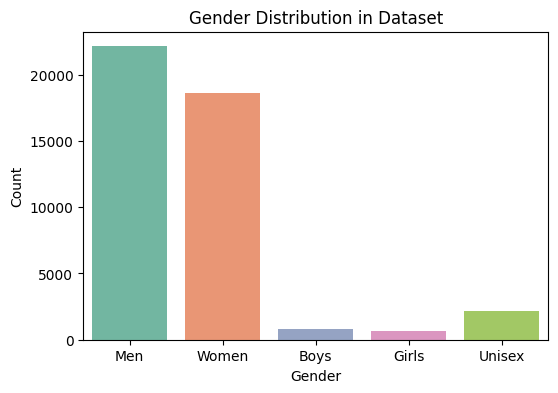

gender
Men       0.498537
Women     0.419390
Unisex    0.048645
Boys      0.018684
Girls     0.014744
Name: proportion, dtype: float64


In [21]:
import matplotlib.pyplot as plt #visualization library
import seaborn as sns  #starting with gender distribution analysis since most of the data is categorical based on that

plt.figure(figsize=(6, 4))
sns.countplot(data=styles_df, x='gender', hue='gender', palette='Set2', legend=False)
plt.title("Gender Distribution in Dataset")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Print proportions
print(styles_df['gender'].value_counts(normalize=True))




Based on the above visualization we get an idea on the gender distribution here only 4.8% is unisex hence if our model can predict the gender distribution the accuracy of 
product prediction will increase and we can see the imbalance in it where male category is 49% and unisex is just 4.8% Hence it will give us an option to train our model
so that it doesnt treat unisex as another feature and ignore it

In [22]:
#Since we were getting warning from seaborn, we can suppress it for now
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#lets just suppress the warnings for now


Next jumping to visualization for article distribution since many products might belong to same master and sub category this will give us a clear insight and better understanding
on how to train our model

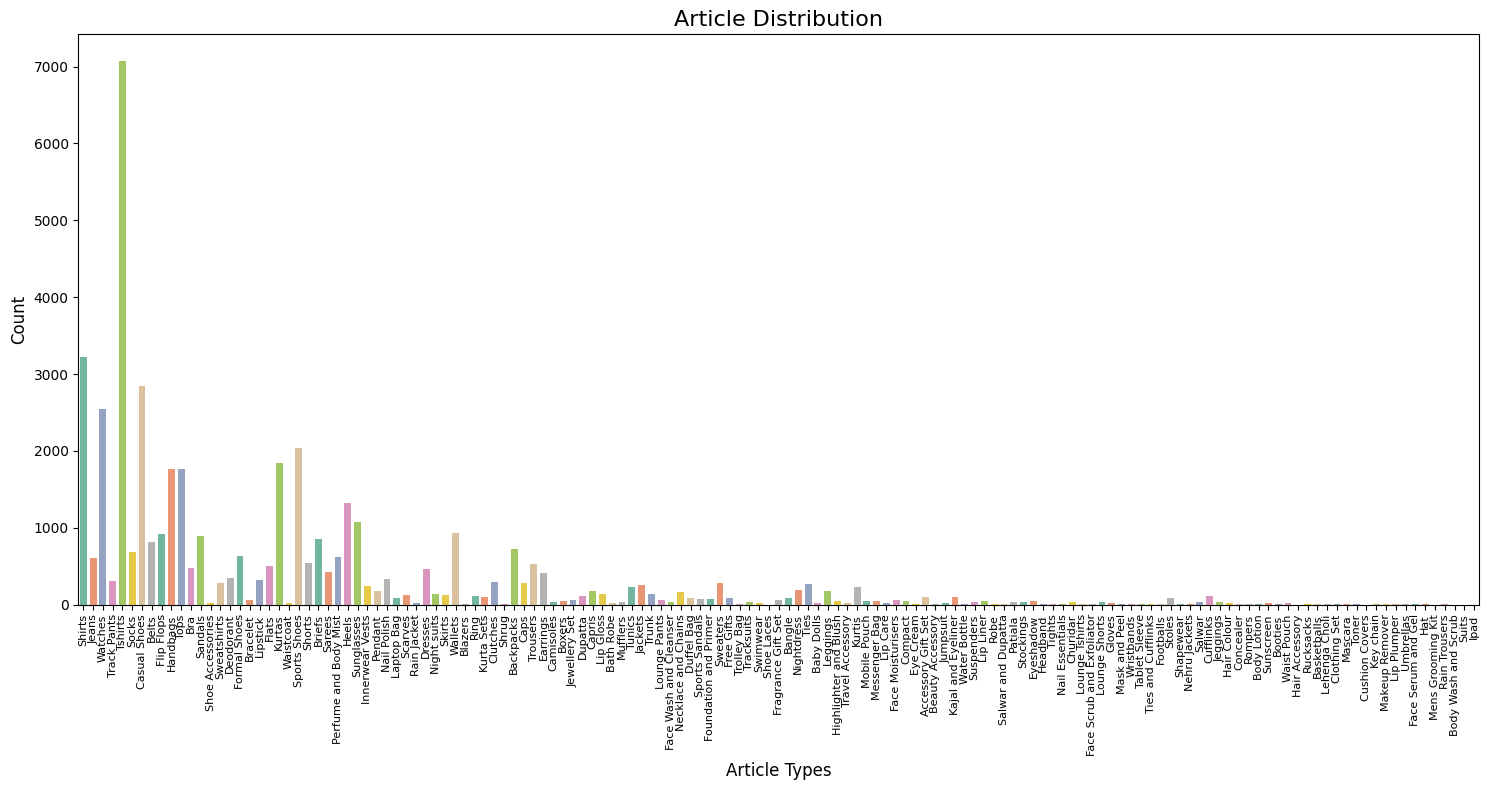

In [23]:
# Set the figure size to make it wider
plt.figure(figsize=(15, 8))

# Create the count plot for article distribution with adjusted bar width
sns.countplot(data=styles_df, x='articleType', palette='Set2', width=0.7)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='center', fontsize=8)

# Add title and labels
plt.title('Article Distribution', fontsize=16)
plt.xlabel('Article Types', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


Here we can observe that the t-shirts are the highest articleType based on count and there are few like ipad, men grooming kit etc which are the lowest so from this we see the imbalance in class , Hence before we dive into handling this imbalances lets visualize the other required information and then proceed to handling imbalance

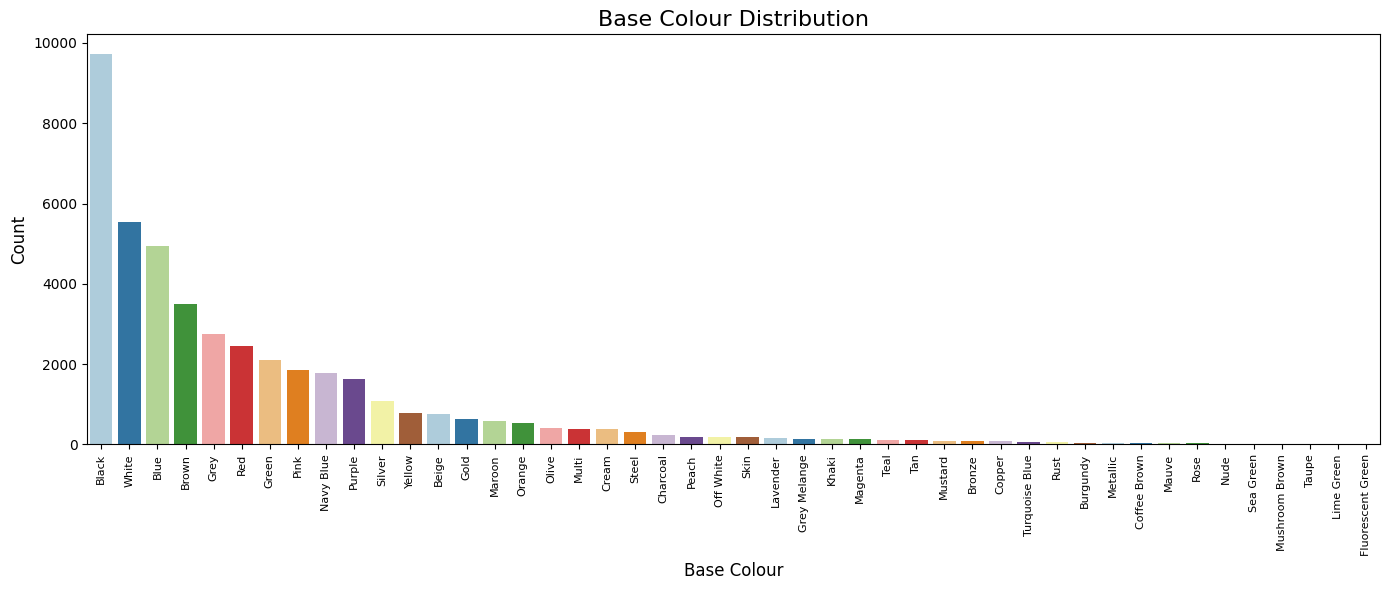

In [24]:
#BaseColor distribution 

plt.figure(figsize=(14, 6))
sns.countplot(
    data=styles_df,
    x='baseColour',
    palette='Paired',
    order=styles_df['baseColour'].value_counts().index
)
plt.xticks(rotation=90, fontsize=8)
plt.title('Base Colour Distribution', fontsize=16)
plt.xlabel('Base Colour', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

Again the huge imbalance where black count is significantly higher showing the trend and demand for black clothes and products in black lets jump into checking the relationship of this with articleType once we visualize the rest 

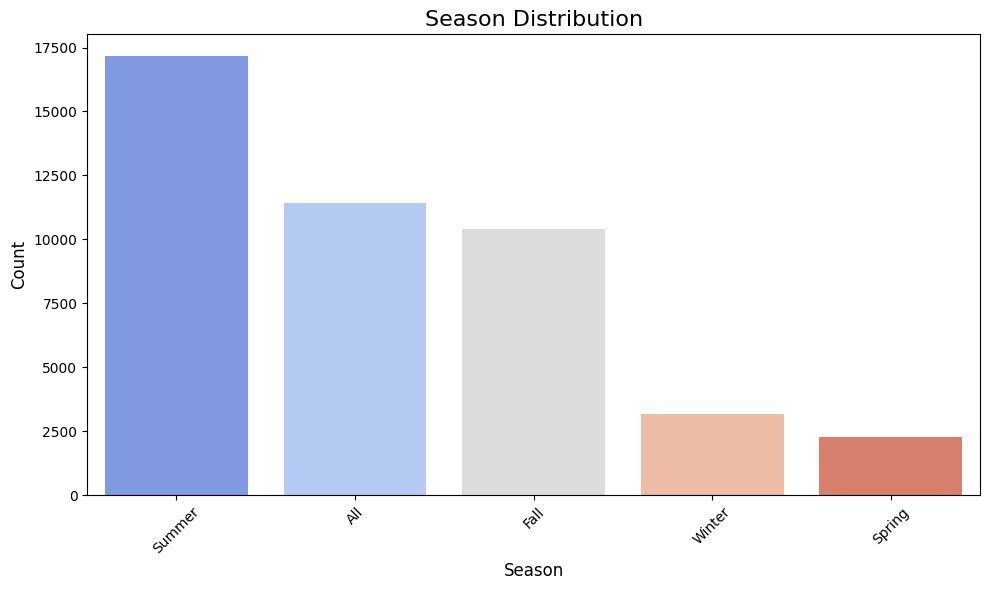

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=styles_df,
    x='season',
    palette='coolwarm',
    order=styles_df['season'].value_counts().index
)
plt.title('Season Distribution', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


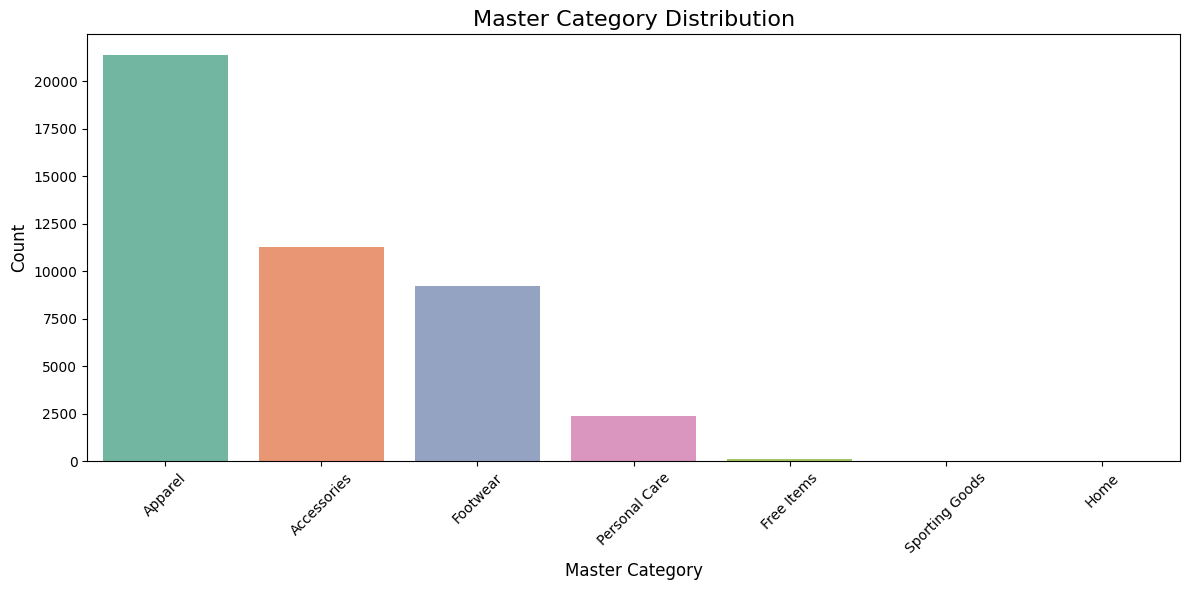

In [26]:
#visualizing master category distribution
plt.figure(figsize=(12, 6))
sns.countplot(
    data=styles_df,
    x='masterCategory',
    palette='Set2',
    order=styles_df['masterCategory'].value_counts().index
)
plt.title('Master Category Distribution', fontsize=16)
plt.xlabel('Master Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


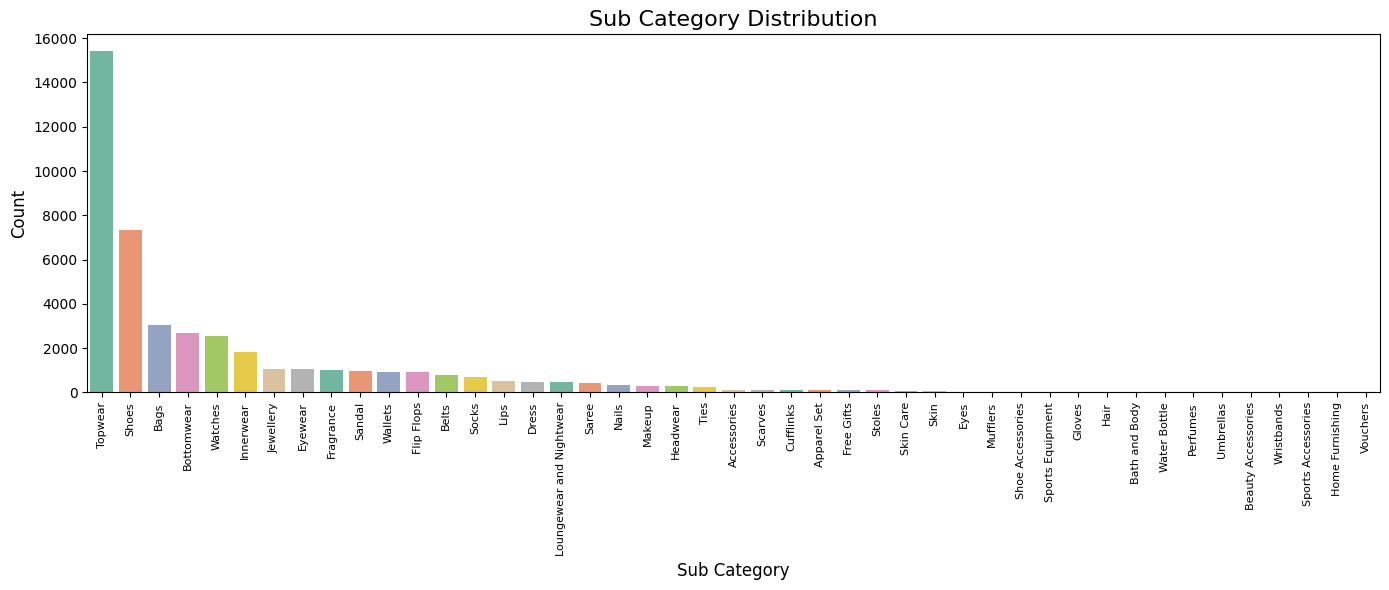

In [27]:
#visualizing sub category distribution

# Create the plot for SubCategory
plt.figure(figsize=(14, 6))
sns.countplot(
    data=styles_df,
    x='subCategory',
    palette='Set2',
    order=styles_df['subCategory'].value_counts().index
)

# Title and labels
plt.title('Sub Category Distribution', fontsize=16)
plt.xlabel('Sub Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Explicitly set the x-tick labels with centered alignment
plt.xticks(rotation=90, ha='center', fontsize=8)

plt.tight_layout()  # Ensures proper layout of the plot
plt.show()



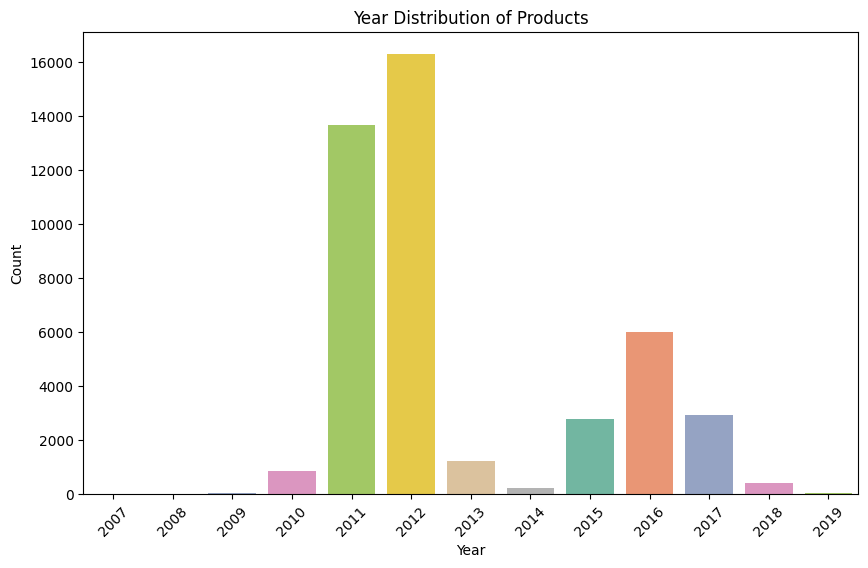

In [28]:
# Year Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=styles_df, x='year', palette='Set2')
plt.title('Year Distribution of Products')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Here too we can observe the imbalance meaning the dataset contains 2012 products way more than the ones of 2014 or 2018 so it might cause an issue if we dealing with a product of same master, sub and articleType with difference in year and display name like a newer version of the product like watches and ipads and so on

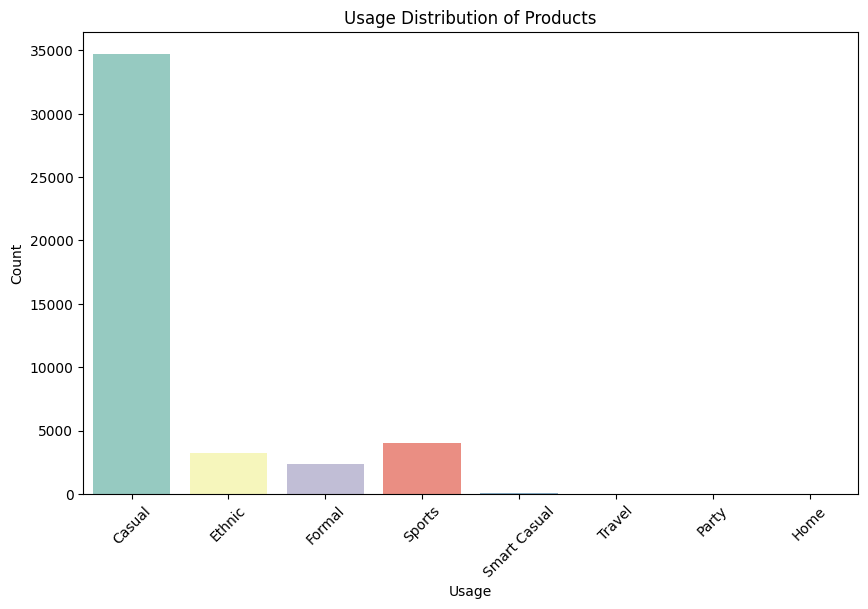

In [29]:
# Usage Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=styles_df, x='usage', palette='Set3')
plt.title('Usage Distribution of Products')
plt.xlabel('Usage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Here casual dominates the usage which can be related to t-shirts and apparels and then those can be linked to season and so on 

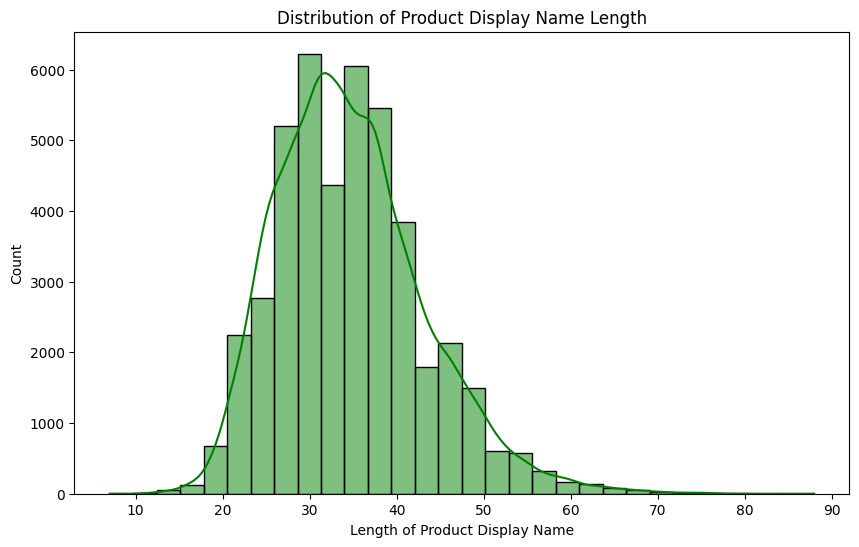

In [30]:
#  ProductDisplayName Length Distribution
# Create a new column for the length of the product names
styles_df['name_length'] = styles_df['productDisplayName'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(data=styles_df, x='name_length', kde=True, color='green', bins=30)
plt.title('Distribution of Product Display Name Length')
plt.xlabel('Length of Product Display Name')
plt.ylabel('Count')
plt.show()

Created a new column name_length to store the length of each product name (the number of characters in productDisplayName).

Used histplot to visualize the distribution of product name lengths. The kernel density estimate (KDE) curve is also plotted to understand the shape of the distribution.

## Here is my conclusion of EDA

## 1.Overview of the Dataset
The dataset consists of product images and associated metadata related to fashion items, including features such as:

Product Type (e.g., T-shirts, Shoes)

Color

Season

Gender (Men, Women, Unisex)

Product Display Name

Usage (e.g., Casual, Formal)

Year of Release (e.g., 2012)

Visualizations were primarily created using Seaborn and Matplotlib to analyze categorical and numerical distributions

## 2.Findings from EDA

a. Missing Values and Data Quality:

Missing values were handled by filling them with contextual or common-sense values. For example, productDisplayName was filled using available patterns in the dataset.

There were no significant duplicate entries, ensuring the dataset's uniqueness and consistency.

b. Categorical Distributions:

Gender Distribution: The dataset shows an imbalanced gender distribution, with male products dominating.

Article Type and Master Category: Topwear is dominant, with products like T-shirts, shoes, kurtas, and handbags being the most frequent. This could impact the model's ability to generalize across other product categories (e.g., accessories, outerwear).

Season Distribution: A strong seasonal bias exists, with certain products being heavily associated with specific seasons. This influences the way we categorize and predict the season of a given product.

Color: The base color distribution is spread across various colors, but some colors like Black and White dominate.

Year: 2012 is the most frequent year in the dataset, while other years (like 2015, 2016) have fewer records. This could potentially bias the model, especially if it's intended to predict the release year based on product characteristics.

Usage: "Casual" is the dominant usage category, while other categories like "Formal" and "Sporty" are underrepresented. This could impact the model's prediction accuracy for minority categories.

c. Feature Relationships:

Article Type and Master Category: There is a strong relationship between the product's article type and the master category. For instance, "Topwear" correlates well with types like T-shirts and Handbags. This is useful in predicting a product’s type based on its visual features.

Season and Product Type: Products like T-shirts, jackets, and sweaters are clearly tied to certain seasons, which can aid in the season prediction task.

Color and Article Type: The dominant color in categories like T-shirts is likely linked to seasonal preferences, e.g., darker colors for winter.

## 3.Assumptions Based on Findings
Season and Article Type Influence: The season and article type heavily influence the other attributes. For instance, a "T-shirt" is likely to be linked with "Summer" or "Spring," while "Sweaters" and "Coats" will align with "Winter."

Product Category Bias: Since categories like "Topwear" dominate, there could be a significant bias in the model toward predicting products like T-shirts or shoes over more niche categories (e.g., jewelry or formal wear).

Year Bias: The dominance of 2012 in the dataset might lead the model to be overly focused on predictions related to products from that year.

Color Bias: Popular colors (like Black, White) might be predicted more frequently than less common colors.

## 4.Impact of EDA Findings on Model Performance
Imbalance Handling: The model will need techniques like class weights or resampling to address the imbalances in usage, year, and product categories. This ensures that predictions are not biased toward the dominant classes.

Feature Engineering: Features like year, season, usage, and articleType will require careful preprocessing (e.g., one-hot encoding) and potentially engineered features to aid the model in making predictions. The model will also need to understand complex relationships between these features.

Model Complexity: Since the model needs to predict multiple attributes (e.g., color, product type, gender, and season), a multi-output deep learning model will be most effective.

## 5.Business Perspective: Impact of Model on E-commerce Platforms
a. Streamlining Product Listing Creation:

Automatic Product Metadata Population: The ability for the model to automatically fill in details like product type, color, season, and gender based on an image is crucial for e-commerce platforms (like Amazon). This would significantly reduce manual effort and speed up product listing creation.

Scalability: The model could scale to handle thousands of products daily, ensuring that new items are quickly categorized and described without requiring manual intervention.

Consistency: Automated metadata generation ensures consistent labeling, reducing human errors and ensuring all product listings follow a uniform format.

b. Enhancing Customer Experience:

Improved Search Accuracy: By associating accurate season, product type, and usage metadata with images, the model can improve search algorithms and product recommendations, helping customers find products faster.

Personalization: Enhanced data like season and color prediction can be used for targeted marketing, helping to recommend products based on a user's shopping history or browsing behavior.

c. Inventory Management:

Trend Detection: The model can help predict which products will likely be in demand during specific seasons (e.g., predicting winter wear trends). This assists in inventory planning and demand forecasting.

Stock Rotation: Automated predictions of seasonality and usage can help in rotating stock in warehouses, ensuring that the right products are promoted at the right time.

d. Operational Efficiency:

Reduced Operational Costs: Automating the process of image-to-metadata conversion reduces the reliance on human workers for product cataloging, leading to significant cost savings.

Faster Onboarding: New product listings can be onboarded quickly, especially with bulk uploads, reducing time-to-market for new products.

## 6.Next Steps for Business Application
To make this model applicable in a real business environment (like Amazon):

The next stage involves training a multi-output image classification model to automate metadata generation using deep learning.

Accuracy and Speed: Ensure that the model is fast enough for real-time predictions, considering the high volume of product images uploaded daily.

Model Deployment: Develop an API to serve the model predictions in real-time, allowing integration with existing e-commerce platforms for automated product listing.

User Feedback Loop: Implement a feedback mechanism to continuously improve model predictions based on user behavior and actual product sales.

## Final Thought:

In conclusion, EDA has helped uncover key relationships and imbalances in the data. By handling these issues and building a deep learning model that can predict multiple attributes of a product from an image, we can streamline the process of creating accurate, consistent, and rich product listings on e-commerce platforms. This has significant business value, improving operational efficiency, customer experience, and sales forecasting.

In [88]:
styles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44424 non-null  object 
 6   season              44424 non-null  object 
 7   year                44424 non-null  int32  
 8   usage               44424 non-null  object 
 9   productDisplayName  44424 non-null  object 
 10  month               32988 non-null  float64
 11  season_relevance    44424 non-null  object 
 12  name_length         44424 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(9)
memory usage: 4.2+ MB


In [89]:
styles_df.isnull().sum()

id                        0
gender                    0
masterCategory            0
subCategory               0
articleType               0
baseColour                0
season                    0
year                      0
usage                     0
productDisplayName        0
month                 11436
season_relevance          0
name_length               0
dtype: int64

Now Before move to the next step lets save this cleaned dataset in another folder so we can build the model on it

In [91]:
# Save cleaned data to a new folder called 'cleaned'
cleaned_path = '../data/cleaned/cleaned_styles.csv'
styles_df.to_csv(cleaned_path, index=False)
